<a href="https://colab.research.google.com/github/willianbazarin/UFMS/blob/main/Mega_grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   bola1  bola2  bola3  bola4  bola5  bola6
0      4      5     30     33     41     52
1      9     37     39     41     43     49
2     10     11     29     30     36     47
3      1      5      6     27     42     59
4      1      2      6     16     19     46
Column names in the DataFrame: ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6']
Os 6 números com maior probabilidade de sair na próxima sequência são:
Número: 10, Frequência: 74
Número: 53, Frequência: 73
Número: 56, Frequência: 71
Número: 4, Frequência: 68
Número: 43, Frequência: 66
Número: 23, Frequência: 66


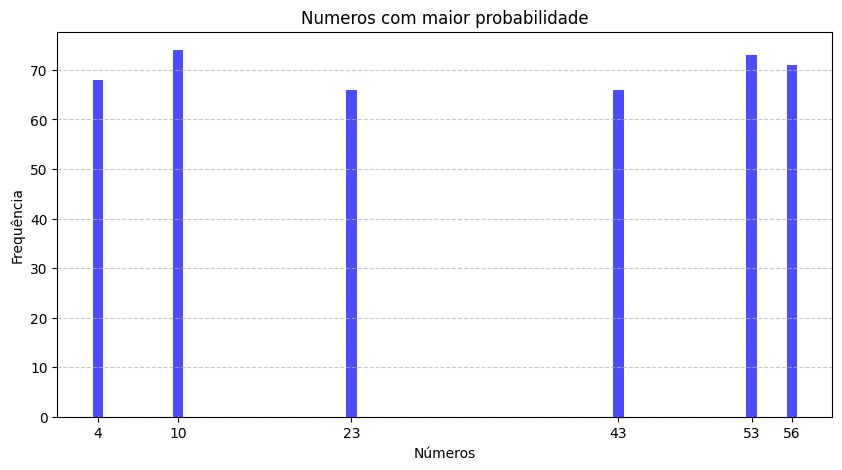

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import matplotlib.pyplot as plt

# Update the URL to point to the raw CSV data
url = 'https://raw.githubusercontent.com/willianbazarin/UFMS/main/Mega_1.csv'  # Corrected URL
data = pd.read_csv(url, sep=';')  # Added separator

# Verifique a estrutura dos dados
print(data.head())

# Get the actual column names from the DataFrame
column_names = data.columns.tolist()
print(f"Column names in the DataFrame: {column_names}")

# Use the actual column names to create numbers_df
numbers_df = data[column_names[:6]]  # Select the first 6 columns, adjust if necessary

# Criar um conjunto de dados de entrada e saída
X = numbers_df.values  # Todas as colunas como entrada
y = numbers_df.values  # Usar as mesmas colunas como saída

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de aprendizado de máquina
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Contar a frequência dos números previstos
# Flatten the predictions and filter the numbers between 1 and 60
predictions_flat = predictions.flatten()
predictions_filtered = [num for num in predictions_flat if 1 <= num <= 60]

# Contar a frequência dos números filtrados
counter = Counter(predictions_filtered)
most_common = counter.most_common(6)  # Pega os 6 números mais comuns

# Exibir os resultados
print("Os 6 números com maior probabilidade de sair na próxima sequência são:")
for number, frequency in most_common:
    print(f"Número: {number}, Frequência: {frequency}")

# Gráfico de probabilidade dos números informados
numbers, frequencies = zip(*most_common)

plt.figure(figsize=(10, 5))
plt.bar(numbers, frequencies, color='blue', alpha=0.7)
plt.xlabel('Números')
plt.ylabel('Frequência')
plt.title('Numeros com maior probabilidade')
plt.xticks(numbers)  # Exibir cada número no eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()